# Prompt to Product: Building an Automated Research Report Generator using CrewAI

In this video, we'll build an automated research report generator tool using the CrewAI multi-agent framework. 

## Me
- Sajal Sharma | Website: www.sajalsharma.com
- AI Engineer with 8+ years if AI/ML experience.
   

## Goals:
- Introduce CrewAI and plan for our research report generator crew.
- Define all the necessary parts of our crew: agents, tasks and tools.
- Run a crew and examine how agents complete their specific tasks to generate the final report.
  

## Short Intro to CrewAI

- What is CrewAI?
  - A framework for orchestrating role-playing autonomous AI agents, to handle complex tasks.
- What is a Crew?
  - A crew in crewAI represents a collaborative group of agents working together to achieve a set of tasks.
  - Possible to customize the strategy for task execution, agent collaboration, and the overall workflow.
- Parts of a Crew
  - Agents: An autonomous component programmed to perform tasks, make decisions and communicate with other agents.
  - Tasks: Specific assignments covered by Agents.
  - Tools: A skill or function that agents can utilize to perform their tasks.

Find out more @ https://docs.crewai.com/

## Plan for the Crew

Our crew will consist of 5 agents:
1. Report Planner
2. Researcher
3. Outline Editor
4. Writer
5. Report Editor

The agents will run in sequence. Each agent will complete its own task before passing on the results to the next agent.

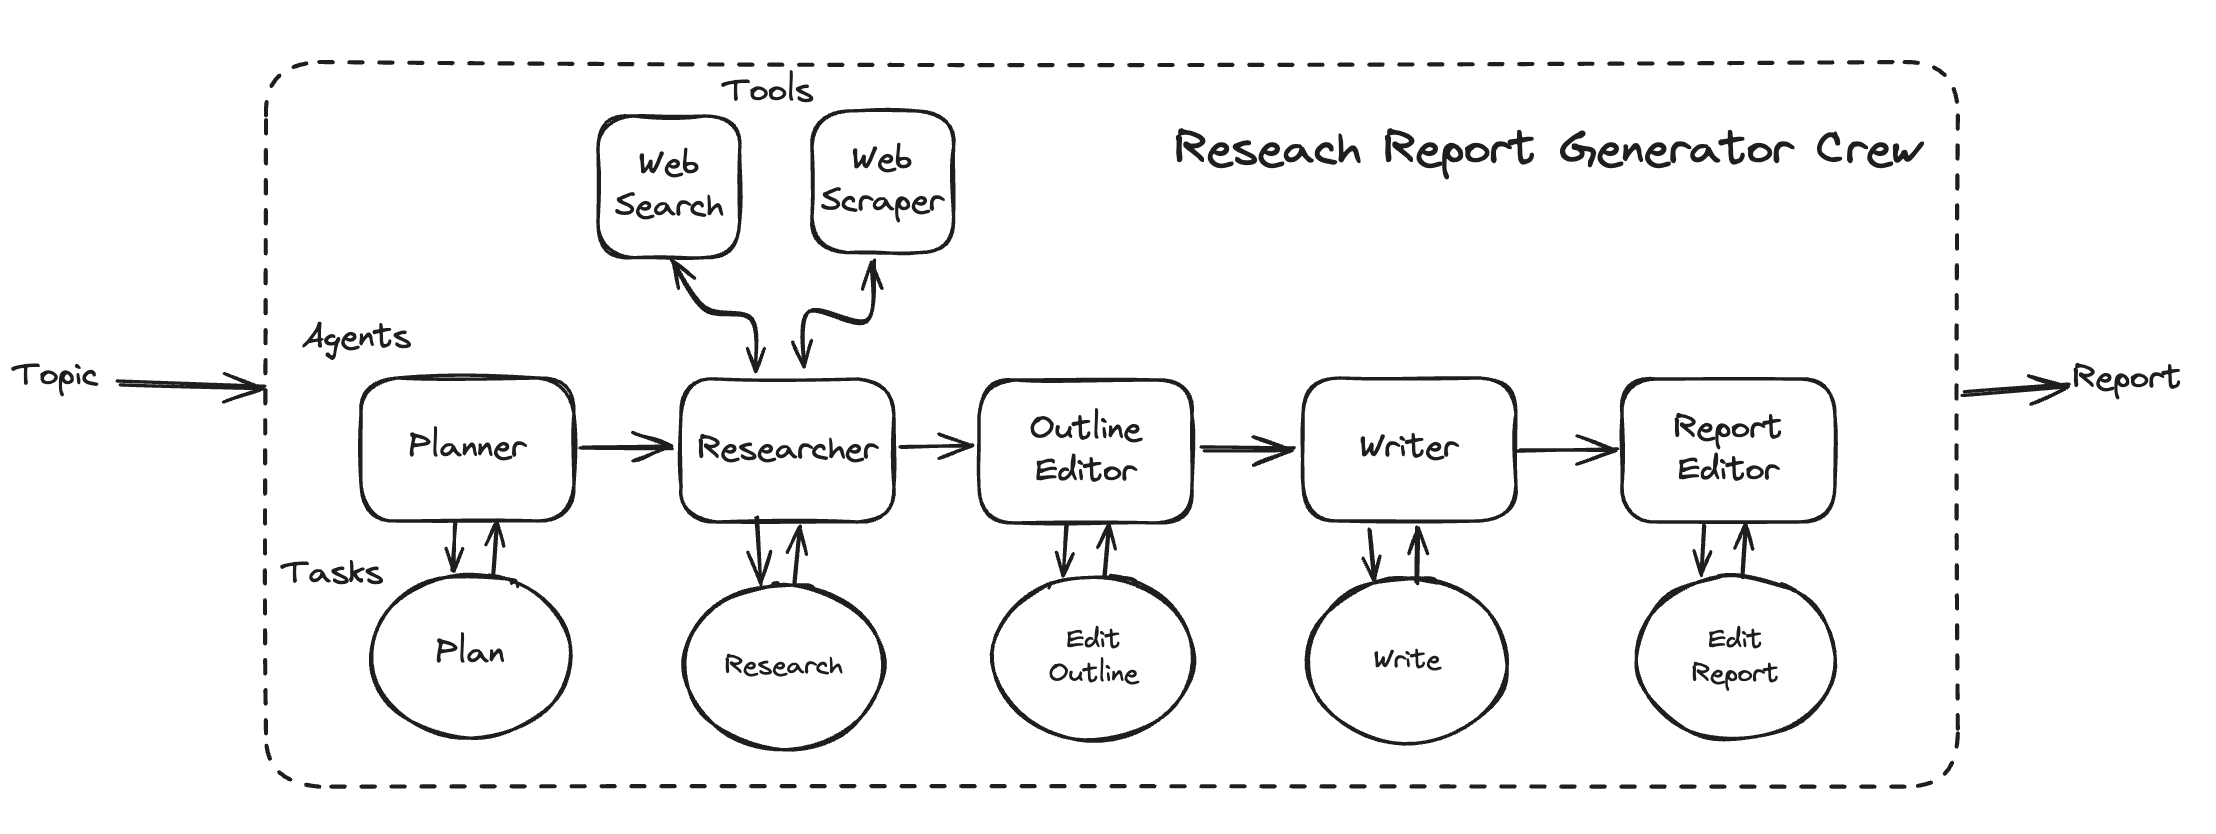

## Step 0: Setup

- Install and Import Libraries
- Set up Environment Variables
- Define CrewAI Tools

In [34]:
# !pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

In [35]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

Imports

In [36]:
from crewai import Agent, Task, Crew

In [37]:
import os

os.environ["OPENAI_API_KEY"] = "" # add openai key here
os.environ["OPENAI_MODEL_NAME"] = 'gpt-4o-mini'
os.environ["SERPER_API_KEY"] = "" # add serper key here

Define crewAI Tools: Import and initialise the tools for searching the web and scraping a website.

In [38]:
from crewai_tools import ScrapeWebsiteTool, SerperDevTool

# Initialize the tools
search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()

## Step 1: Creating Agents

- Define your Agents, and provide them a `role`, `goal` and `backstory`.
- It has been seen that LLMs perform better when they are role playing.

*Video Talking Points, don't keep cell in final notebook*

**Note**: The benefit of using _multiple strings_ :
```Python
varname = "line 1 of text"
          "line 2 of text"
```

versus the _triple quote docstring_:
```Python
varname = """line 1 of text
             line 2 of text
          """
```
is that it can avoid adding those whitespaces and newline characters, making it better formatted to be passed to the LLM.

### Agent: Planner

In [39]:
planner = Agent(
    role="Report Planner",
    goal="Plan a comprehensive and factually accurate report on {topic}",
    backstory="You're an expert editor specializing in the meticulous planning of reports. "
              "For the topic: {topic}, you gather essential information, create an initial outline, "
              "and organize the content framework. Your objective is to provide a clear, logical structure "
              "that guides the Researcher in conducting detailed research and filling in the content. "
              "Your planning ensures the report is thorough, informative, and helps the audience gain "
              "insight and make well-informed decisions.",
    allow_delegation=False,
	verbose=True
)

### Agent: Researcher

In [40]:
researcher = Agent(
    role="Researcher",
    goal="Conduct web research on {topic} and provide comprehensive and accurate content.",
    tools=[search_tool, scrape_tool],
    backstory="You are an experienced researcher tasked with gathering detailed, reliable information on {topic}. "
              "By utilizing web search and scraping tools, you collect comprehensive data and insights. "
              "Your research serves as the foundational content that the Content Writer will use to create an informed and engaging article. "
              "Your thorough investigation ensures the report is factual, current, and highly informative.",
    allow_delegation=False,
    verbose=True
)

### Agent: Outline Editor

In [41]:
outline_editor = Agent(
    role="Outline Editor",
    goal="Review and refine the content outline to ensure it is comprehensive and well-structured.",
    backstory="You are a skilled editor responsible for reviewing and enhancing the content outline. "
              "Based on the initial outline and the latest research results, your task is to ensure the outline "
              "is complete, logically organized, and accurately reflects the research findings. "
              "Your meticulous editing prepares the outline for the Content Writer to transform it "
              "into a comprehensive and engaging article.",
    allow_delegation=False,
    verbose=True
)

### Agent: Writer

In [42]:
writer = Agent(
    role="Report Writer",
    goal="Write a comprehensive and factually accurate report on {topic}.",
    backstory="You are a skilled report writer tasked with creating a detailed and informative report on {topic}. "
              "Your work is based on extensive research and a well-structured outline provided by the Research Planner and Outline Editor. "
              "Your objective is to transform this information into a coherent, engaging, and insightful report. "
              "You ensure that the report is complete, logically organized, and highly informative, "
              "delivering valuable insights to the audience and supporting them in making well-informed decisions.",
    allow_delegation=False,
    verbose=True
)

### Agent: Report Editor

In [43]:
report_editor = Agent(
    role="Editor",
    goal="Edit a given research report to align with the overall writing style to be coherent and consistent.",
    backstory="You are an experienced editor responsible for reviewing the research report written by the Report Writer. "
              "Your goal is to ensure that the report adheres to the organization's writing style, follows journalistic best practices, "
              "and provides balanced viewpoints when presenting opinions or assertions. "
              "You meticulously review the content for accuracy, clarity, and coherence, ensuring that the report is polished, professional, "
              "and avoids major controversial topics or opinions whenever possible.",
    allow_delegation=False,
    verbose=True
)


## Step 2: Creating Tasks

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

### Task: Plan

In [44]:
plan = Task(
    description=(
        "1. Utilize your expertise to prioritize the most relevant trends, key concepts, "
        "and important aspects related to {topic}.\n"
        "2. Create a detailed content outline that includes main topics, subtopics, "
        "and a logical structure for the research report.\n"
        "3. Ensure that the outline provides a clear framework that guides further research "
        "and writing efforts."
    ),
    expected_output="A comprehensive content outline document with main topics, subtopics, "
                    "and a well-structured framework for the research report.",
    agent=planner,
)

### Task: Research

In [45]:
research = Task(
    description=(
        "1. Use your web search and scraping tools to gather detailed and reliable information on {topic}.\n"
        "2. Identify and collect data from authoritative sources, ensuring the information is accurate and current.\n"
        "3. Organize the collected information into a comprehensive research document, organized by key points and subtopics.\n"
        "4. Cite all sources properly to ensure the credibility and traceability of the information."
    ),
    expected_output="A comprehensive research document with detailed summaries of web content, organized by key points and subtopics, including proper citations.",
    agent=researcher,
)

### Task: Edit Outline

In [46]:
edit_outline = Task(
    description=(
        "1. Review the initial content outline to understand its structure and key points.\n"
        "2. Incorporate the results of the research conducted by the research agent.\n"
        "3. Update the outline to ensure it comprehensively covers all key points and findings from the research.\n"
        "4. Verify the logical flow and organization of the sections to ensure coherence.\n"
        "5. Ensure the outline is clear, detailed, and sufficiently structured for the Content Writer to follow easily."
    ),
    expected_output="A refined content outline that comprehensively covers all key points, logically organized, and ready for the Content Writer.",
    agent=outline_editor,
)

### Task: Write

In [47]:
write = Task(
    description=(
        "1. Use the content plan and refined outline to craft a comprehensive research report on {topic}.\n"
        "2. Ensure sections and subtitles are engaging and appropriately named.\n"
        "3. Structure the report with a captivating introduction, insightful body, and a summarizing conclusion.\n"
        "4. Cite appropriate sources as footnotes, utilizing the research document for accurate referencing.\n"
    ),
    expected_output="A well-written research report in markdown format, ready for publication, "
                    "with each section containing 2 or 3 paragraphs and all sources cited as footnotes.",
    agent=writer,
)

### Task: Edit Report

In [48]:
edit_report = Task(
    description=(
        "1. Review the research report for grammatical errors and correct them.\n"
        "2. Ensure all sections are well-structured and each section contains 2 or 3 paragraphs.\n"
        "3. Verify that all sources are properly cited as footnotes.\n"
        "4. Make any necessary adjustments to improve clarity, coherence, and readability."
    ),
    expected_output="A polished and well-written research report in markdown format, ready for publication, "
                    "with each section containing 2 or 3 paragraphs and all sources cited as footnotes.",
    agent=report_editor,
)

## Step 3: Creating the Crew

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: *For this simple example*, the tasks will be performed sequentially (i.e they are dependent on each other), so the _order_ of the task in the list _matters_.
- `verbose=2` allows you to see all the logs of the execution. 

In [49]:
crew = Crew(
    agents=[planner, researcher, outline_editor, writer, report_editor],
    tasks=[plan, research, edit_outline, write, edit_report],
    verbose=2
)

2024-07-27 13:49:10,529 - 8082202304 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


## Step 4: Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

- Crew requires the topic for the research as its input. We'll ask it to create a report on Artificial Intelligence in 2024.

In [50]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence in 2024"})

 [DEBUG]: == Working Agent: Report Planner
 [INFO]: == Starting Task: 1. Utilize your expertise to prioritize the most relevant trends, key concepts, and important aspects related to Artificial Intelligence in 2024.
2. Create a detailed content outline that includes main topics, subtopics, and a logical structure for the research report.
3. Ensure that the outline provides a clear framework that guides further research and writing efforts.


> Entering new CrewAgentExecutor chain...
I now can give a great answer.  
Final Answer: 

**Comprehensive Content Outline: Artificial Intelligence in 2024**

**I. Introduction**  
   A. Definition of Artificial Intelligence (AI)  
   B. Importance of AI in the modern world  
   C. Purpose and scope of the report  
   D. Overview of key trends in AI for 2024  

**II. Current State of AI (2023 Review)**  
   A. Technological advancements in AI  
      1. Machine Learning (ML)  
      2. Natural Language Processing (NLP)  
      3. Computer Vision  


- Display the results of your execution as markdown in the notebook.

In [51]:
from IPython.display import Markdown
Markdown(result)

```markdown
# Artificial Intelligence in 2024: Trends, Applications, and Ethical Considerations

## I. Introduction

### A. Definition of Artificial Intelligence (AI)
Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems. These processes include learning (the acquisition of information and rules for using it), reasoning (using the rules to reach approximate or definite conclusions), and self-correction. AI technologies enable machines to perform tasks that typically require human intelligence, such as understanding natural language, recognizing patterns, and making decisions based on data.

### B. Importance of AI in the Modern World
AI has become an integral part of various sectors, enhancing efficiency, accuracy, and productivity while driving innovation. From automating routine tasks to providing insights from vast amounts of data, AI has transformed the way businesses operate and interact with consumers. It has improved user experiences by enabling personalized services and solutions tailored to individual preferences and needs, fostering a more efficient and responsive environment.

### C. Purpose and Scope of the Report
This report aims to analyze the state of AI in 2024, detailing trends, advancements, applications, and ethical considerations. It serves as a comprehensive guide for stakeholders, including businesses, policymakers, and researchers, to understand the evolving landscape of AI and its implications for various sectors and society at large.

### D. Overview of Key Trends in AI for 2024
In 2024, several key trends are shaping the AI landscape: the rise of small language models that offer specialized capabilities, enhanced multimodal AI systems that integrate various forms of data, and an increased focus on responsible AI practices to address ethical concerns. These trends reflect the ongoing evolution of AI technologies and their growing importance in everyday applications.

## II. Current State of AI (2023 Review)

### A. Technological Advancements in AI
#### 1. Machine Learning (ML)
The year 2023 witnessed significant innovations in machine learning algorithms, enhancing predictive accuracy and enabling more sophisticated data analysis. These advancements have allowed organizations to harness data more effectively, leading to improved decision-making processes and operational efficiencies.

#### 2. Natural Language Processing (NLP)
Natural Language Processing saw remarkable developments with the introduction of more efficient models, including advancements in GPT-4 and its successors. These improvements have facilitated better understanding and generation of human language, allowing for more natural interactions between humans and machines, thereby expanding the applications of NLP across various sectors.

#### 3. Computer Vision
In 2023, computer vision technologies improved significantly, allowing for enhanced visual data interpretation. These advancements have had implications across multiple sectors, including healthcare for medical imaging analysis, manufacturing for quality control, and security for surveillance systems.

### B. AI in Various Sectors
#### 1. Healthcare
AI's role in healthcare has expanded, with AI-driven diagnostics and treatment planning becoming more prevalent. These technologies have improved patient outcomes by providing healthcare professionals with actionable insights and assisting in the early detection of diseases.

#### 2. Finance
In the financial sector, AI has been instrumental in implementing algorithms for fraud detection and automated trading. These innovations help financial institutions minimize risks and enhance operational efficiency, leading to more secure transactions and better investment strategies.

#### 3. Transportation
The transportation industry has seen advancements in autonomous vehicles and AI-driven logistics optimization. These technologies promise to revolutionize how goods and people are transported, enhancing safety and efficiency while reducing costs.

#### 4. Retail
AI has transformed retail by creating personalized shopping experiences through consumer data analysis. Retailers leverage AI tools to analyze purchasing behaviors and preferences, enabling them to offer tailored recommendations that enhance customer satisfaction.

### C. Regulatory Landscape
The regulatory landscape surrounding AI is evolving, with significant developments such as the European Union's AI Act aimed at establishing comprehensive guidelines for AI use. This increased scrutiny reflects growing concerns about ethical implications and the need for accountability in AI technologies.

## III. Key Trends in AI for 2024

### A. Enhanced AI Capabilities
#### 1. Generative AI
Generative AI is expected to proliferate in 2024, particularly in content creation and data synthesis applications. This trend will enable businesses and individuals to leverage AI for generating high-quality text, images, and other media forms, thereby enhancing creativity and efficiency.

#### 2. Explainable AI
As the demand for transparency grows, explainable AI will become increasingly important. Stakeholders will seek to understand AI decision-making processes to ensure accountability and trust in AI systems, leading to the development of frameworks that make AI operations more interpretable.

#### 3. AI Ethics and Accountability
With the rise of AI technologies, there will be a heightened emphasis on responsible AI practices, including bias mitigation and ethical considerations. Organizations will need to prioritize ethical AI development to build trust among users and comply with emerging regulations.

### B. AI and Automation
#### 1. Workforce Impact
Projections for 2024 indicate that AI will create approximately 97 million new jobs while augmenting existing roles. This shift highlights the potential for AI to enhance human capabilities rather than simply replace them, leading to a more collaborative workforce.

#### 2. Reskilling and Upskilling Needs
As AI integration accelerates, there will be a growing need for reskilling and upskilling initiatives. Organizations will be responsible for providing training programs to prepare employees for new roles and ensure they can effectively collaborate with AI technologies.

### C. AI in Decision Making
#### 1. Data-Driven Insights
AI tools are increasingly utilized for data-driven insights, enabling organizations to make informed decisions based on real-time data analysis. This capability enhances strategic planning and operational execution across various sectors.

#### 2. Predictive Analytics
The development of predictive analytics models will facilitate proactive strategies for businesses, allowing them to forecast trends and adapt to changing market conditions. This trend will empower organizations to remain competitive in a rapidly evolving environment.

### D. AI and Cybersecurity
#### 1. Threat Detection
AI systems are enhancing capabilities in identifying and responding to cyber threats. By analyzing patterns and anomalies in data, AI can detect potential security breaches more effectively than traditional methods.

#### 2. Autonomous Response Systems
The application of AI in autonomous response systems is expected to grow, allowing organizations to automate responses to security incidents. This capability will improve the speed and efficiency of threat mitigation efforts.

## IV. Applications of AI in 2024

### A. Industry-Specific Applications
#### 1. Healthcare
In healthcare, AI will continue to enhance diagnostic and treatment efficiencies, with AI systems providing detailed analyses of patient data to support clinical decision-making and improve outcomes.

#### 2. Finance
The finance sector will leverage advanced fraud detection methodologies powered by AI, enabling institutions to safeguard against increasingly sophisticated cyber threats and improve financial security.

#### 3. Transportation
Innovations in autonomous vehicle technology will transform the transportation industry, leading to safer and more efficient travel options for consumers and businesses alike.

#### 4. Retail
AI-driven personalized customer experiences will become even more prevalent, with retailers utilizing AI to analyze consumer behavior and preferences. This approach will result in tailored shopping experiences that enhance customer loyalty.

### B. Emerging Applications
#### 1. AI in Climate Change Solutions
AI will play a crucial role in addressing climate change challenges through applications in environmental monitoring and resource management, enabling more sustainable practices across industries.

#### 2. AI-Driven Content Creation
The utilization of AI in generating articles, reports, and creative content will gain traction, empowering individuals and organizations to produce high-quality content efficiently.

## V. Ethical Considerations

### A. Bias in AI Algorithms
Addressing algorithmic bias and fairness remains a critical challenge for AI developers. Ensuring that AI systems operate equitably across diverse populations is essential for maintaining public trust and achieving ethical AI deployment.

### B. Privacy Concerns
As AI capabilities expand, safeguarding personal data becomes increasingly important. Organizations must implement robust data protection measures to ensure user privacy and comply with regulatory requirements.

### C. Accountability and Governance
Establishing frameworks for responsible AI use is vital to ensure accountability in AI development and deployment. Clear guidelines and governance structures will help mitigate ethical risks associated with AI technologies.

### D. Public Perception and Trust in AI
Growing concerns regarding the implications of AI technologies on society necessitate efforts to build public trust. Transparent communication about AI capabilities and limitations is essential for fostering a positive perception of AI.

## VI. Challenges and Risks

### A. Technological Limitations
Despite advancements, challenges related to model generalization and reliability persist. Ensuring that AI systems perform consistently across varied contexts is crucial for their widespread adoption.

### B. Implementation Hurdles
Barriers to adopting AI technologies within legacy systems can hinder progress. Organizations must address these challenges to leverage AI's full potential and integrate it seamlessly into existing workflows.

### C. Economic Implications
The economic implications of AI, including job displacement versus job creation, require careful consideration. Stakeholders must work collaboratively to address potential disruptions and ensure a balanced transition.

### D. Societal Impacts
The broader effects of AI on social dynamics and equity must be explored. Addressing potential inequalities arising from AI adoption is essential for fostering an inclusive and equitable future.

## VII. Future Outlook

### A. Predictions for AI Development Beyond 2024
Insights into the evolution of AI technologies suggest continued advancements in machine learning, natural language processing, and computer vision. These innovations will further enhance AI's capabilities and applications across various sectors.

### B. Potential Game-Changers in AI Technology
Identifying innovations that could redefine AI applications will be crucial in shaping future developments. Emerging technologies, such as quantum computing and advanced neural networks, have the potential to significantly impact AI's capabilities.

### C. Long-Term Societal Implications
Analyzing how AI will influence future societal structures is vital for understanding its long-term implications. Stakeholders must consider the ethical and social dimensions of AI to ensure its responsible integration into society.

## VIII. Conclusion

### A. Summary of Findings
This report highlights key insights regarding AI trends and applications in 2024, emphasizing the importance of ethical considerations and the need for responsible AI practices. The advancements in AI technologies present significant opportunities for various sectors while also posing challenges that must be addressed.

### B. Importance of Adapting to AI Advancements
As AI continues to evolve, stakeholders must embrace the changes it brings. Adapting to AI advancements will be crucial for organizations seeking to remain competitive and relevant in an increasingly digital economy.

### C. Call to Action for Stakeholders
Collaboration among stakeholders is essential for shaping the future of AI. By working together, businesses, policymakers, and researchers can ensure that AI technologies are developed and deployed responsibly, maximizing their benefits while minimizing risks.

## IX. References
1. IBM Blog. "The most important AI trends in 2024." Retrieved from [IBM](https://www.ibm.com/blog/artificial-intelligence-trends/).  
2. Stanford AI Index Report 2024. Retrieved from [Stanford University](https://aiindex.stanford.edu/report/).  
3. Microsoft News. "3 big AI trends to watch in 2024." Retrieved from [Microsoft](https://news.microsoft.com/three-big-ai-trends-to-watch-in-2024/).  
4. Forbes Advisor. "24 Top AI Statistics & Trends In 2024." Retrieved from [Forbes](https://www.forbes.com/advisor/business/ai-statistics/).
```